# U Food Marketing Analysis Project 

## Key Objectives are:
1. Explore the data – don’t just plot means and counts. Provide insights, define cause and effect. Provide a better understanding of the characteristic features of respondents;
2. Propose and describe a customer segmentation based on customers behaviors;
3. Visualize data and provide written reasoning behind discoveries;

## The Company
Consider a well-established company operating in the retail food sector. Presently they have around several hundred thousands of registered customers and serve almost one million consumers a year. They sell products from 5 major categories: wines, rare meat products, exotic fruits, specially prepared fish and sweet products. These can further be divided into gold and regular products. The customers can order and acquire products through 3 sales channels: physical stores, catalogs and company’s website. Globally, the company had solid revenues and a healthy bottom line in the past 3 years, but the profit growth perspectives for the next 3 years are not promising... For this reason, several strategic initiatives are being considered to invert this situation. One is to improve the performance of marketing activities, with a special focus on marketing campaigns.


In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [29]:
food = pd.read_csv(r'/Users/tylerkurcz/Desktop/Analyst Builder Python Courses/u_food_marketing.csv')

In [3]:
pd.set_option('display.max.columns', 50)
pd.set_option('display.max.rows', 2300)

In [27]:
food[food.duplicated()].sum()
food.drop_duplicates(keep = False, inplace = True)

In [5]:
food['Total_Children'] = food[['Kidhome', 'Teenhome']].sum(axis = 1)
food.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Customer_Days,marital_Divorced,marital_Married,marital_Single,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,Total_Children
0,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,63,2822,0,0,1,0,0,0,0,1,0,0,1529,1441,0,0
1,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,66,2272,0,0,1,0,0,0,0,1,0,0,21,15,0,2
2,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,55,2471,0,0,0,1,0,0,0,1,0,0,734,692,0,0
3,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,36,2298,0,0,0,1,0,0,0,1,0,0,48,43,0,1
4,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,39,2320,0,1,0,0,0,0,0,0,0,1,407,392,0,1


In [28]:
food['marital_Divorced'] = food['marital_Divorced'].replace({1:5,0:0})
food['marital_Married'] = food['marital_Married'].replace({1:4,0:0})
food['marital_Single'] = food['marital_Single'].replace({1:3,0:0})
food['marital_Together'] = food['marital_Together'].replace({1:2,0:0})
food['marital_Widow'] = food['marital_Widow'].replace({1:1,0:0})

food['Martial_Status'] = food[['marital_Divorced', 'marital_Married', 'marital_Single', 'marital_Together', 'marital_Widow']].sum(axis = 1)
food[food['Martial_Status']!= 0].head()

food['Marital_Status_str'] = food['Martial_Status'].map({5: 'Divorced', 4: 'Married', 3: 'Single', 2: 'Together', 1: 'Widow'})

In [7]:
food['education_2n Cycle'] = food['education_2n Cycle'].replace({1:1,0:0})
food['education_Basic'] = food['education_Basic'].replace({1:2,0:0})
food['education_Graduation'] = food['education_Graduation'].replace({1:3,0:0})
food['education_Master'] = food['education_Master'].replace({1:4,0:0})
food['education_PhD'] = food['education_PhD'].replace({1:5,0:0})


food['Education_Status'] = food[['education_2n Cycle', 'education_Basic', 'education_Graduation', 'education_Master', 'education_PhD']].sum(axis = 1)
food[food['Martial_Status']!= 0].head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Customer_Days,marital_Divorced,marital_Married,marital_Single,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,Total_Children,Martial_Status,Marital_Status_str,Education_Status
0,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,63,2822,0,0,3,0,0,0,0,3,0,0,1529,1441,0,0,3,Single,3
1,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,66,2272,0,0,3,0,0,0,0,3,0,0,21,15,0,2,3,Single,3
2,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,55,2471,0,0,0,2,0,0,0,3,0,0,734,692,0,0,2,Together,3
3,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,36,2298,0,0,0,2,0,0,0,3,0,0,48,43,0,1,2,Together,3
4,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,39,2320,0,4,0,0,0,0,0,0,0,5,407,392,0,1,4,Married,5


In [8]:
food['Accepted_Campaigns'] = food[['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Response']].sum(axis = 1)
food['Accepted_Campaigns'] = (food['Accepted_Campaigns'] != 0).astype(int)
food[food['Accepted_Campaigns'] != 0].head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Customer_Days,marital_Divorced,marital_Married,marital_Single,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,Total_Children,Martial_Status,Marital_Status_str,Education_Status,Accepted_Campaigns
0,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,63,2822,0,0,3,0,0,0,0,3,0,0,1529,1441,0,0,3,Single,3,1
8,30351.0,1,0,19,14,0,24,3,3,2,1,3,0,2,9,0,0,0,0,0,0,3,11,1,46,2547,0,0,0,2,0,0,0,0,0,5,44,42,0,1,2,Together,5,1
9,5648.0,1,1,68,28,0,6,1,1,13,1,1,0,0,20,1,0,0,0,0,0,3,11,0,70,2267,0,0,0,2,0,0,0,0,0,5,36,23,1,2,2,Together,5,1
17,76995.0,0,1,91,1012,80,498,0,16,176,2,11,4,9,5,0,0,0,1,0,0,3,11,0,71,2617,0,4,0,0,0,0,0,0,4,0,1606,1430,1,1,4,Married,4,1
21,58607.0,0,1,63,867,0,86,0,0,19,3,2,3,9,8,0,1,0,0,0,0,3,11,0,71,2712,0,4,0,0,0,0,0,0,0,5,953,934,1,1,4,Married,5,1


In [9]:
food.corr(method = 'pearson', numeric_only = True)['Accepted_Campaigns'].sort_values(ascending = False)

Accepted_Campaigns      1.000000
AcceptedCmpOverall      0.713352
Response                0.685109
AcceptedCmp4            0.465985
AcceptedCmp3            0.453742
AcceptedCmp5            0.441264
AcceptedCmp1            0.426687
MntWines                0.416651
MntTotal                0.393910
MntRegularProds         0.391931
NumCatalogPurchases     0.322143
MntMeatProducts         0.298240
Income                  0.292812
NumWebPurchases         0.221217
MntGoldProds            0.188209
AcceptedCmp2            0.174619
MntSweetProducts        0.156430
MntFruits               0.149973
MntFishProducts         0.145404
NumStorePurchases       0.144965
Customer_Days           0.083874
Education_Status        0.062534
marital_Single          0.051947
education_PhD           0.043488
marital_Widow           0.038379
Age                     0.013540
education_Master        0.012535
marital_Divorced        0.002049
education_Graduation   -0.006359
Martial_Status         -0.021551
marital_To

<Axes: >

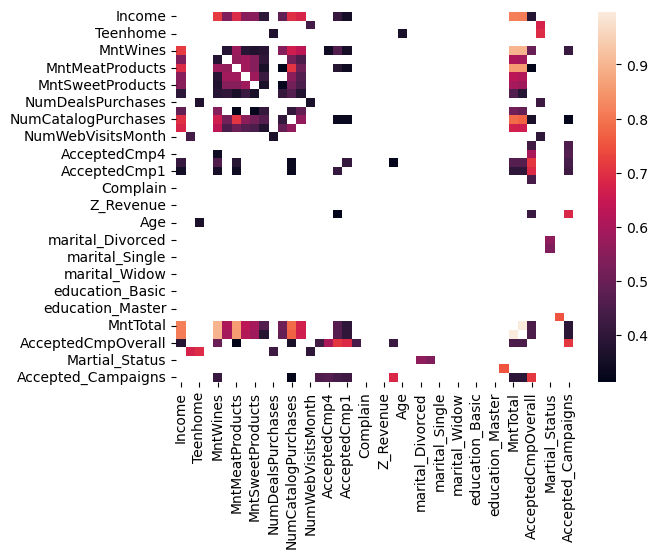

In [10]:
all_correlations = food.corr(method = 'pearson', numeric_only = True)
all_correlations = all_correlations[(all_correlations > 0.3) & (all_correlations < 1)]

sns.heatmap(all_correlations)

In [11]:
age_groups = [(23,30), (31,40), (41, 50), (51,60), (61,70), (71,85)]

def assign_age_group (Age):
    for age_range in age_groups:
        if age_range[0] <= Age <= age_range[1]:
            return f"{age_range[0]} - {age_range[1]}"
    return('Unknown')
    
food['Age_Group'] = food['Age'].apply(assign_age_group)
food[['Age', 'Age_Group']].head()

,Age,Age_Group
0,63,61 - 70
1,66,61 - 70
2,55,51 - 60
3,36,31 - 40
4,39,31 - 40


<Axes: xlabel='Age_Group', ylabel='Accepted_Campaigns'>

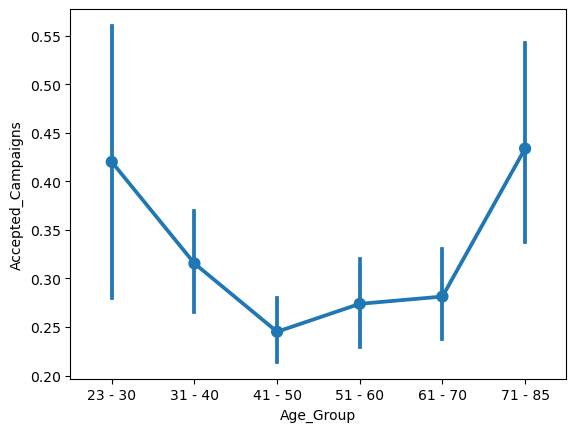

In [12]:
age_order = ['23 - 30', '31 - 40', '41 - 50', '51 - 60', '61 - 70', '71 - 85']

sns.pointplot(data = food, x = 'Age_Group', y = 'Accepted_Campaigns', order = age_order)

In [13]:
counts = food['Age_Group'].value_counts()
percentage = counts / food.shape[0]

In [14]:
percent_food = percentage.reset_index()
percent_food.columns = ['age_group', 'percentage']
percent_food = percent_food.sort_values('age_group')
percent_food

,age_group,percentage
5,23 - 30,0.027130
3,31 - 40,0.161693
0,41 - 50,0.332067
1,51 - 60,0.221921
2,61 - 70,0.212154
4,71 - 85,0.045035


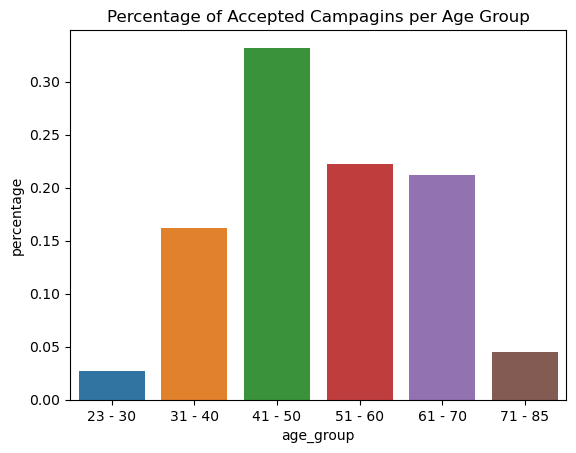

In [15]:
sns.barplot(data = percent_food, x = 'age_group', y = 'percentage')
plt.title('Percentage of Accepted Campagins per Age Group')
plt.show()

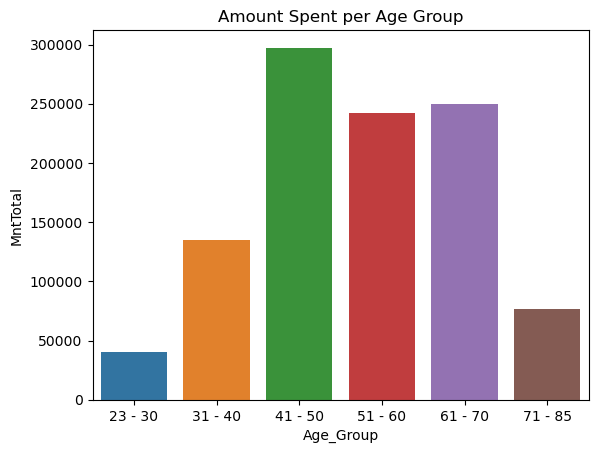

In [16]:
grouped_food = food.groupby('Age_Group')['MntTotal'].sum().reset_index()

sns.barplot(data = grouped_food, x = 'Age_Group', y = 'MntTotal')
plt.title('Amount Spent per Age Group')
plt.show()

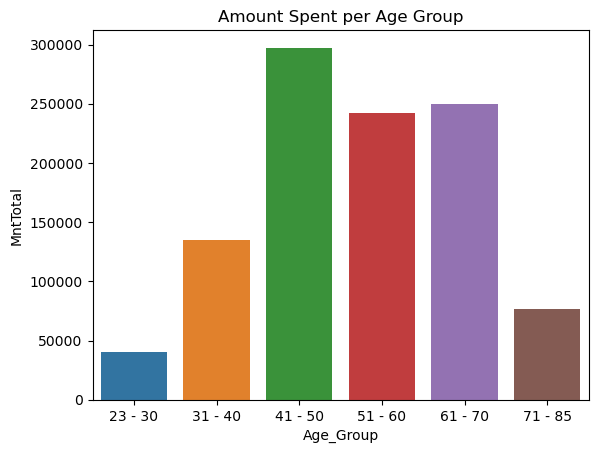

In [17]:
acct_camp = food[food['Accepted_Campaigns'] != 0]

grouped_food = food.groupby('Age_Group')['MntTotal'].sum().reset_index()

sns.barplot(data = grouped_food, x = 'Age_Group', y = 'MntTotal')
plt.title('Amount Spent per Age Group')
plt.show()

# Age Segmentation - Core audience for accepting campagins right now is 31-70. 23-30, 71 and up accept at higher rates

<Axes: xlabel='Type_of_Purhcase', ylabel='Sum'>

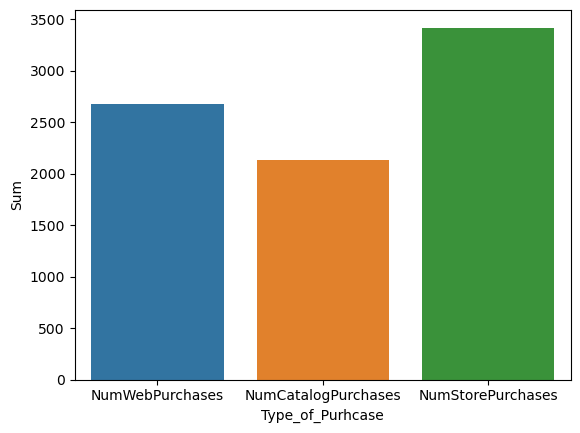

In [18]:
acct_camp = food[food['Accepted_Campaigns'] != 0]

sum_food = pd.DataFrame(acct_camp[['NumWebPurchases','NumCatalogPurchases','NumStorePurchases']].sum(), columns = ['Sum'])
sum_food = sum_food.reset_index()
sum_food.rename(columns = {'index': 'Type_of_Purhcase'}, inplace = True)
sns.barplot(x = 'Type_of_Purhcase', y = 'Sum', data = sum_food)

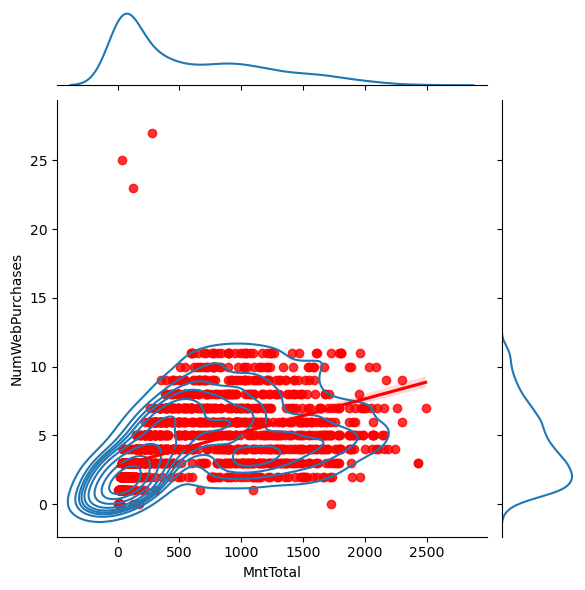

In [19]:
x = sns.jointplot(data = food, x = 'MntTotal', y = 'NumWebPurchases', kind = "kde")
x.plot_joint(sns.regplot, color = 'red')

# 2 Directions: Boost up the higher percentage catalog customers OR Focus on In Store/Web because they have more traffic.

<Axes: xlabel='Total_Children', ylabel='Accepted_Campaigns'>

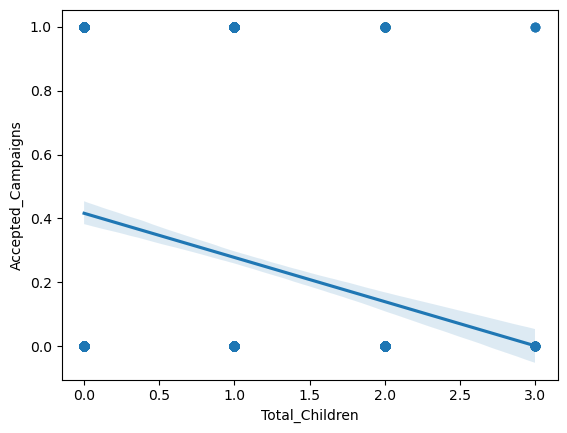

In [20]:
sns.regplot(data = food, x = 'Total_Children', y = 'Accepted_Campaigns')

# Less kids = More likely to accept campaign 

<Axes: xlabel='Education_Status', ylabel='Accepted_Campaigns'>

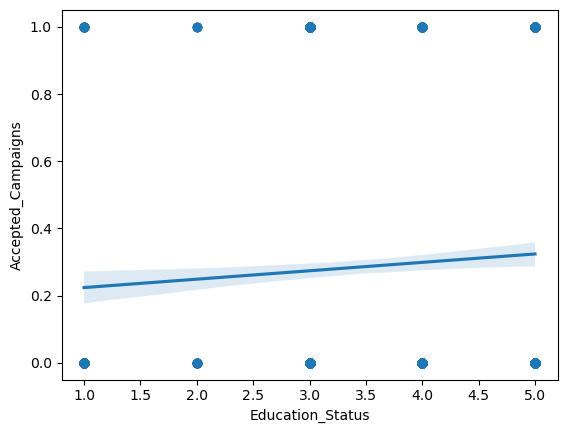

In [21]:
sns.regplot(data = food, x = 'Education_Status', y = 'Accepted_Campaigns')

# Education isnt really significant in segementation 

<Axes: xlabel='Marital_Status_str', ylabel='count'>

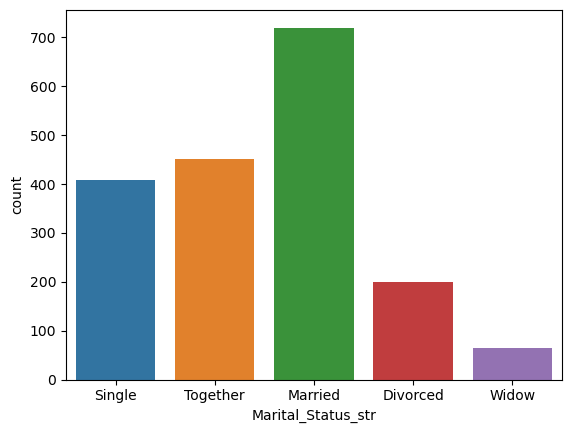

In [22]:
sns.countplot(x = 'Marital_Status_str', data = food)

<Axes: xlabel='Martial_Status', ylabel='Accepted_Campaigns'>

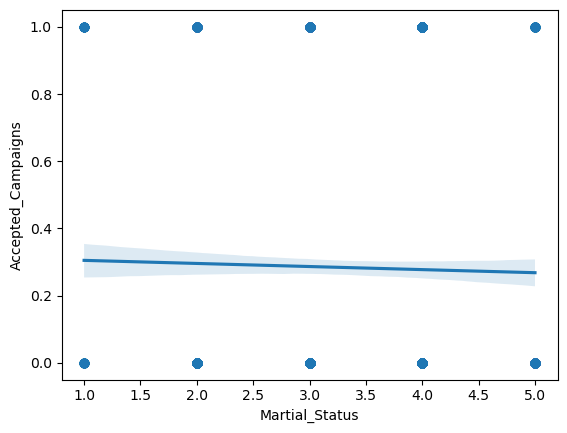

In [23]:
sns.regplot(data = food, x = 'Martial_Status', y = 'Accepted_Campaigns')

<Axes: xlabel='Marital_Status_str', ylabel='MntTotal'>

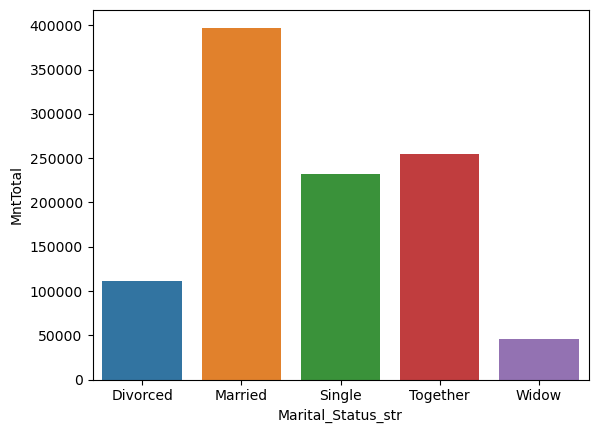

In [24]:
acct = food[food['Accepted_Campaigns'] != 0]


rel_food = food.groupby('Marital_Status_str')['MntTotal'].sum().reset_index()

sns.barplot(data = rel_food, x = 'Marital_Status_str', y = 'MntTotal')

<Axes: xlabel='Marital_Status_str', ylabel='MntTotal'>

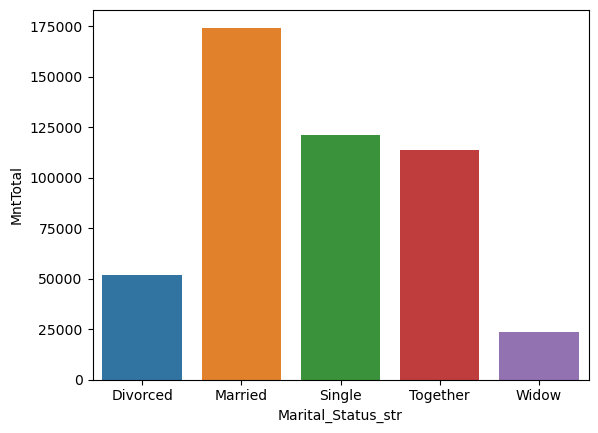

In [25]:
acct = food[food['Accepted_Campaigns'] != 0]


rel_food = acct.groupby('Marital_Status_str')['MntTotal'].sum().reset_index()

sns.barplot(data = rel_food, x = 'Marital_Status_str', y = 'MntTotal')

<Axes: xlabel='Marital_Status', ylabel='Percentage'>

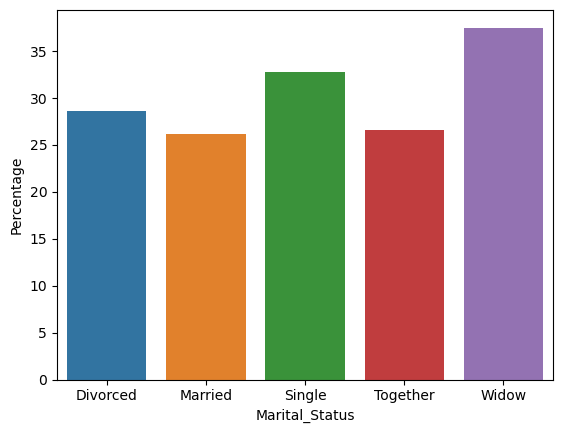

In [26]:
total = food['Marital_Status_str'].value_counts()
accepted = food[food['Accepted_Campaigns']== 1]['Marital_Status_str'].value_counts()

pect_marital = accepted / total * 100
pect_food = pect_marital.reset_index()
pect_food.columns = ['Marital_Status', 'Percentage']
sns.barplot(data = pect_food, x = 'Marital_Status', y = 'Percentage')

## Overall Findings

1. Age: 30-70 Were spending more money, but less likely to accept campaigns. Higher volume here though. 
2. Catalog was more likely to accept campaigns, but in person spent more. Recommend a split between all (i.e., 40% Catalog, 30% store, 30% web).
3. Focus on people with no kids or less kids
4. Education: no impact, dont target any group for campagin 
5. Marital Status: Does not play a big part. Married, Single, Together spends more money 
### Reccomendations for higher profit 
1. Middle aged people, highe earners, with no kids. Target on platforms with split above 
### New Users to Spend Money 
2. Focus on 23-30 year olds and 70 and up who statistically accepted campaigns at a higher rate. 